<a href="https://colab.research.google.com/github/Sneha1928/Survival-Detection/blob/main/Survival_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Objective**


**A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals**.

**Being a Data Scientist, I will be solving this problem.I'll be developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year)**.

# **Dataset & Data Description**

The dataset contains data collected from a hospital in Greenland. The Target Variable is  “Survived_1_year” column which has binary entries (i.e. 1 and 0).



*   **Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment**.
*   **Survived_1_year == 1, implies that the patient survived after 1 year of treatment**.



**Importing Data....**

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1




*   ID_Patient_Care_Situation: Care situation of a patient during treatment
*   Diagnosed_Condition: The diagnosed condition of the patient
*   Diagnosed_Condition: The diagnosed condition of the patient
*   Treatment_with_drugs: Class of drugs used during treatment
*   Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
*   Patient_Age: Age of the patient
*   Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
*   Patient_Smoker: If the patient was a smoker or not
*   Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
*   Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn’t have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )



In [ ]:
import pandas as pd   # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

# **Observations:**


1.   There are 23097 observations divided into 17 columns.
2.   There are some missing values in the dataset.

Let’s take a look at the distribution of our target variable to determine if we have a balanced dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


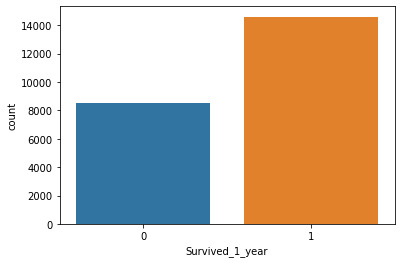

In [ ]:
sns.countplot("Survived_1_year",data=data)

There are 8000+ patients who has not been survived after one year and there are 14000+ who has been survived after one year of treatment. So, the ratio is 1:2. Hence, the set is balanced.

In [ ]:
num_feat = [i for i in data.columns if data[i].dtypes != 'O' and i !='ID_Patient_Care_Situation' and i != 'Patient_ID']
num_feat

['Diagnosed_Condition',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Z',
 'Number_of_prev_cond',
 'Survived_1_year']

'ID_Patient_Care_Situation' and  'Patient_ID' are just ID hence ignoring. Checking if there is null value in the  numerical column.

'Number_of_prev_cond' in the data set is dependent on 'A','B','C','D','E','F', and 'Z', hence removing it

In [ ]:
num_feat = [i for i in data.columns if data[i].dtypes != 'O' and i !='ID_Patient_Care_Situation' and i != 'Patient_ID' and i != 'A' and i != 'C' and i != 'B' and i != 'D' and i != 'E' and i != 'F' and i != 'Z']
num_feat

['Diagnosed_Condition',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'Number_of_prev_cond',
 'Survived_1_year']

In [ ]:
for j in num_feat:
  print("missing values in {0} is {1}".format(j, data[j].isnull().sum()))

missing values in Diagnosed_Condition is 0
missing values in Patient_Age is 0
missing values in Patient_Body_Mass_Index is 0
missing values in Number_of_prev_cond is 1235
missing values in Survived_1_year is 0


Since Number_of_prev_cond is dependent on A, B, C, D, E, F,Z and these columns are contains categorical columns.So the column ‘Number_of_prev_cond’ have discrete values from integers 0 to 7 and can be considered as categorical column as it has only 7 different values. Hence here we can fill the missing values with mode. Hence, we will use mode for imputation of missing value.

In [ ]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].fillna(data['Number_of_prev_cond'].mode()[0])

In [ ]:
for j in num_feat:
  print("missing values in {0} is {1}".format(j, data[j].isnull().sum()))

missing values in Diagnosed_Condition is 0
missing values in Patient_Age is 0
missing values in Patient_Body_Mass_Index is 0
missing values in Number_of_prev_cond is 0
missing values in Survived_1_year is 0


In [ ]:
for j in num_feat:
  print(data[j].describe())

count    23097.000000
mean        26.413127
std         15.030865
min          0.000000
25%         13.000000
50%         26.000000
75%         39.000000
max         52.000000
Name: Diagnosed_Condition, dtype: float64
count    23097.000000
mean        33.209768
std         19.549882
min          0.000000
25%         16.000000
50%         33.000000
75%         50.000000
max        149.000000
Name: Patient_Age, dtype: float64
count    23097.000000
mean        23.454820
std          3.807661
min          1.089300
25%         20.205550
50%         23.386199
75%         26.788154
max         29.999579
Name: Patient_Body_Mass_Index, dtype: float64
count    23097.000000
mean         1.710352
std          0.768216
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: Number_of_prev_cond, dtype: float64
count    23097.000000
mean         0.632247
std          0.482204
min          0.000000
25%          0.000000
50%          1.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fb0a5c6a278>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb0a5c6ac88>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0a5c74748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0a5c743c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb0a5c6a588>,
  <matplotlib.lines.Line2D at 0x7fb0a5c6a908>]}

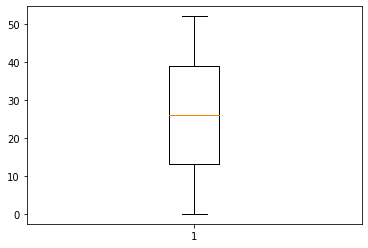

In [ ]:
plt.boxplot(data['Diagnosed_Condition'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb0a603d8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb0a6048320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0a6048da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0a6048a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb0a603dbe0>,
  <matplotlib.lines.Line2D at 0x7fb0a603df60>]}

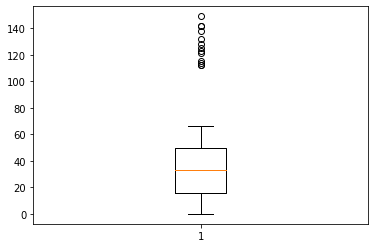

In [ ]:
plt.boxplot(data['Patient_Age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb0a5f9f940>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb0a5fab390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0a5fabe10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0a5faba90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb0a5f9fc50>,
  <matplotlib.lines.Line2D at 0x7fb0a5f9ffd0>]}

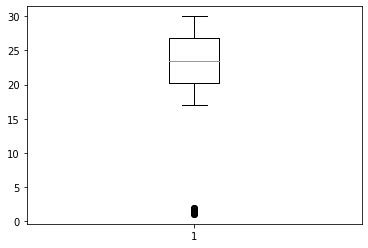

In [ ]:
plt.boxplot(data['Patient_Body_Mass_Index'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb0a5f3d5f8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb0a5f48048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0a5f48ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0a5f48748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb0a5f3d908>,
  <matplotlib.lines.Line2D at 0x7fb0a5f3dc88>]}

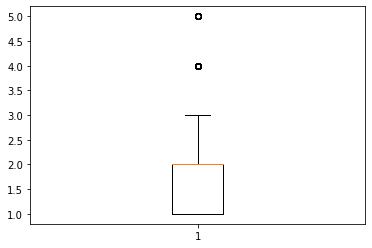

In [ ]:
plt.boxplot(data['Number_of_prev_cond'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb0a5bdfbe0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb0a5bed630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0a5bf70f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0a5bedd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb0a5bdfef0>,
  <matplotlib.lines.Line2D at 0x7fb0a5bed2b0>]}

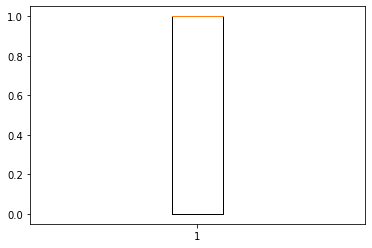

In [ ]:
plt.boxplot(data['Survived_1_year'])

In [ ]:
datanum = data.select_dtypes(include=[np.number])
datanum.head(5)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
datanum = datanum.drop(['ID_Patient_Care_Situation','Patient_ID','A', 'C' ,'B','D','E', 'F' , 'Z','Survived_1_year'],axis=1)

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(datanum))
print(z)

[[1.22504763 1.16577305 1.30671867 0.37704774]
 [1.42464126 0.14272684 0.1337474  0.9246969 ]
 [0.22707948 0.75655456 1.06503569 0.9246969 ]
 ...
 [0.16054827 1.52383922 1.0624125  0.9246969 ]
 [1.025454   0.41994858 0.06941569 0.37704774]
 [0.3601419  0.85885918 1.32989062 2.98053703]]


Correlation

In [ ]:
datanum.corr()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond
Diagnosed_Condition,1.000000,-0.008971,0.008305,0.002793
Patient_Age,-0.008971,1.000000,-0.006560,-0.014670
Patient_Body_Mass_Index,0.008305,-0.006560,1.000000,-0.016848
Number_of_prev_cond,0.002793,-0.014670,-0.016848,1.000000


Finally, we must look at the EDA for our categorical variables. However, before analyzing the categorical columns further, we will treat the missing values.

In [ ]:
data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond             0
Survived_1_year                 0
dtype: int64

In [ ]:
data['Treated_with_drugs'] = data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0])

In [ ]:
data['A'].fillna(data['A'].mode()[0], inplace = True)
data['B'].fillna(data['B'].mode()[0], inplace = True)
data['C'].fillna(data['C'].mode()[0], inplace = True)
data['D'].fillna(data['D'].mode()[0], inplace = True)
data['E'].fillna(data['E'].mode()[0], inplace = True)
data['F'].fillna(data['F'].mode()[0], inplace = True)
data['Z'].fillna(data['Z'].mode()[0], inplace = True)

In [ ]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

Handling Categorical Variable

We will find which are the categorical variables. We can see that datanum has numerical data then remaining data are categorical. We haven't done feature selection yet.

In [ ]:
cat_feat = data.drop(datanum.columns,axis=1)
cat_feat.head()

,ID_Patient_Care_Situation,Patient_ID,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,22374,3333,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,18164,5740,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6283,10446,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5339,12011,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,33012,12513,DX6,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


I can drop IDs because it is not categorical variable.

In [ ]:
cat_feat = cat_feat.drop(['ID_Patient_Care_Situation', 'Patient_ID'],axis=1)

Let's see if ID is created randomly or not. If it has different ids for different attributes then I'll drop that else will have to handle it.

In [ ]:
data.nunique()

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10570
Treated_with_drugs              32
Patient_Age                     78
Patient_Body_Mass_Index      10570
Patient_Smoker                   3
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              5
Survived_1_year                  2
dtype: int64

In [ ]:
cat_feat.nunique()

Treated_with_drugs          32
Patient_Smoker               3
Patient_Rural_Urban          2
Patient_mental_condition     1
A                            2
B                            2
C                            2
D                            2
E                            2
F                            2
Z                            2
Survived_1_year              2
dtype: int64

So ‘Treated_with_drugs’ column has 32 unique values while ‘Patient_Smoker’ has only 3 categorical values. ‘Patient_mental_condition’ column has only 1 categorical value.

Visualization of categorical columns

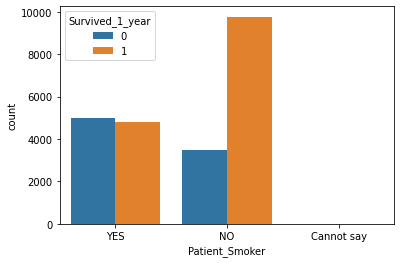

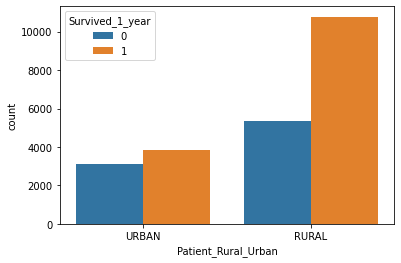

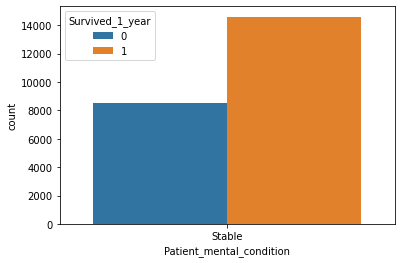

In [ ]:
for feature in ['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition']:
  sns.countplot(x=feature,  hue='Survived_1_year', data=cat_feat)
  plt.show()

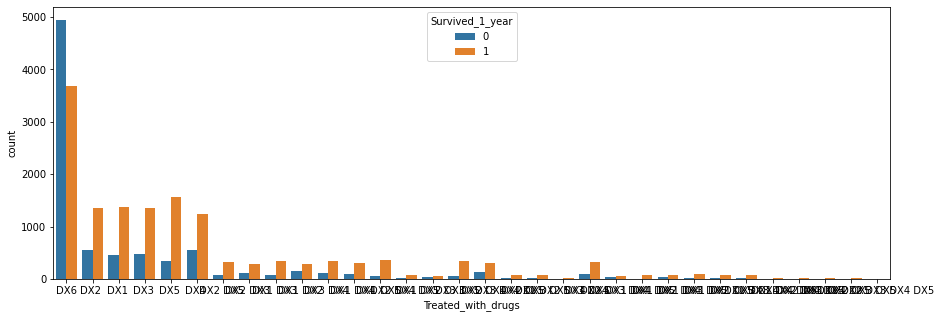

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Treated_with_drugs',  hue='Survived_1_year', data=cat_feat)
plt.show()

Pre-Processing and Data Cleaning of Categorical Variables

In [ ]:
drugs = data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [ ]:
data = pd.concat([data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
data = data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1


‘Patient_Smoker’ is also a categorical column and we need to create dummies for this too. If you observe the data, the column ‘Patient_Smoker’ has a category ‘Cannot say’.

In [ ]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

There can be different ways to deal with the category ‘Cannot say’. Here we will consider it as missing value and fill those entries with the mode value of the column. Here, mode of the table is 'No'. 

In [ ]:
data.Patient_Smoker[data['Patient_Smoker']=='Cannot say'] = 'NO'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.Patient_Smoker.value_counts()

NO     13259
YES     9838
Name: Patient_Smoker, dtype: int64

In [ ]:
data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

The column ‘Patient_mental_condition’ has only one category ‘stable’. So we can drop this column as for every observation the entry here is ‘stable’. This feature won’t be useful for making the prediction of the target variable as it doesn’t provide any useful insights of the data. Hence, It is better to remove this kind of features.

In [ ]:
data.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let’s convert the remaining categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [ ]:
data = pd.get_dummies(data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,1,0,0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1,1,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Patient_Age                23097 non-null  int64  
 4   Patient_Body_Mass_Index    23097 non-null  float64
 5   A                          23097 non-null  float64
 6   B                          23097 non-null  float64
 7   C                          23097 non-null  float64
 8   D                          23097 non-null  float64
 9   E                          23097 non-null  float64
 10  F                          23097 non-null  float64
 11  Z                          23097 non-null  float64
 12  Number_of_prev_cond        23097 non-null  float64
 13  Survived_1_year            23097 non-null  int

In [ ]:
print(data.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(data.Patient_ID.nunique())

23097
10570


We can see there are 23097 unique ‘ID_Patient_Care_Situation’ and there are 23097 total observations in the dataset. So this column can be dropped.

Now, there are only 10570 unique values in the column ‘Patient_ID’. This means there are some patient who came two or more times in the hospital because it is possible the same person was sick for two or more than two times (with different illness) and visited hospital for the treatment. And the same patient will have different caring condition for different diseases.

So there are some useful information in the column - ‘Patient_ID’ and thus we will not drop this column.

In [ ]:
data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

Prepare Train/Test Data

In [ ]:
X = data.drop('Survived_1_year',axis=1)
y = data['Survived_1_year']

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Model Building

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [ ]:
mdl1 = tree.DecisionTreeClassifier(max_depth = 5)
mdl1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred1 = mdl1.predict(X_train)
pred1_test = mdl1.predict(X_test)

#train
cfm1 = confusion_matrix(y_train,pred1)
t1 = sum(sum(cfm1))
acc1 = (cfm1[0,0]+cfm1[1,1])/t1 
print("Accuracy of train set",acc1)

#test
cfm2 = confusion_matrix(y_test,pred1_test)
t2 = sum(sum(cfm2))
acc2 = (cfm2[0,0]+cfm2[1,1])/t2
print("Accuracy of train set",acc2)

Accuracy of train set 0.773393949234183
Accuracy of train set 0.7651515151515151


Using Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, max_features=4, max_depth=6)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred1 = forest.predict(X_train)
pred1_test = forest.predict(X_test)

#train
cfm1 = confusion_matrix(y_train,pred1)
t1 = sum(sum(cfm1))
acc1 = (cfm1[0,0]+cfm1[1,1])/t1 
print("Accuracy of train set",acc1)

#test
cfm2 = confusion_matrix(y_test,pred1_test)
t2 = sum(sum(cfm2))
acc2 = (cfm2[0,0]+cfm2[1,1])/t2
print("Accuracy of train set",acc2)

Accuracy of train set 0.7864371921848785
Accuracy of train set 0.7751082251082251


Since, we are not getting that good accuracy let's do feature selection

In [ ]:
data.corr()

NameError: ignored

In [ ]:
#Applying SelectKBest class to extract top features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeat = SelectKBest(score_func=chi2,k=10)
fit = bestfeat.fit(X,y)

In [ ]:
scores = pd.DataFrame(fit.scores_)
col = pd.DataFrame(X.columns)

In [ ]:
# for better visualization
feat_scores = pd.concat([col,scores],axis=1)
feat_scores.columns = ['Feature','Score']

In [ ]:
feat_scores

,Feature,Score
0,Diagnosed_Condition,3.911777
1,Patient_ID,847.049092
2,Patient_Age,1492.526517
3,Patient_Body_Mass_Index,211.949748
4,A,4.204848
5,B,59.881498
6,C,30.026883
7,D,246.599166
8,E,1.039154
9,F,0.002020


In [ ]:
print(feat_scores.nlargest(22,'Score'))

                      Feature        Score
17                        DX6  1569.208989
2                 Patient_Age  1492.526517
19         Patient_Smoker_YES   853.235703
1                  Patient_ID   847.049092
16                        DX5   679.074878
18          Patient_Smoker_NO   633.089437
12                        DX1   318.757285
14                        DX3   304.877971
7                           D   246.599166
3     Patient_Body_Mass_Index   211.949748
21  Patient_Rural_Urban_URBAN   205.167057
15                        DX4   173.081882
13                        DX2   150.575842
20  Patient_Rural_Urban_RURAL    88.544578
11        Number_of_prev_cond    67.478174
5                           B    59.881498
6                           C    30.026883
10                          Z     7.561597
4                           A     4.204848
0         Diagnosed_Condition     3.911777
8                           E     1.039154
9                           F     0.002020


In [ ]:
data1 = data.drop(['E','F'],axis=1)

In [ ]:
X = data1.drop('Survived_1_year',axis=1)
y = data['Survived_1_year']
import sklearn as sk
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, max_features=5, max_depth=7)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred1 = forest.predict(X_train)
pred1_test = forest.predict(X_test)

#train
cfm1 = confusion_matrix(y_train,pred1)
t1 = sum(sum(cfm1))
acc1 = (cfm1[0,0]+cfm1[1,1])/t1 
print("Accuracy of train set",acc1)

#test
cfm2 = confusion_matrix(y_test,pred1_test)
t2 = sum(sum(cfm2))
acc2 = (cfm2[0,0]+cfm2[1,1])/t2
print("Accuracy of train set",acc2)

Accuracy of train set 0.7981815229745088
Accuracy of train set 0.7805194805194805


In [ ]:
rf_imp_fscore = f1_score(y_test, pred1_test)
print(rf_imp_fscore)

0.8494105927278763


Since again we are not getting that good accuracy I'll do Boruta Method

In [ ]:
#!pip install Boruta


In [ ]:
from boruta import BorutaPy

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        23097 non-null  int64  
 1   Patient_ID                 23097 non-null  int64  
 2   Patient_Age                23097 non-null  int64  
 3   Patient_Body_Mass_Index    23097 non-null  float64
 4   A                          23097 non-null  float64
 5   B                          23097 non-null  float64
 6   C                          23097 non-null  float64
 7   D                          23097 non-null  float64
 8   E                          23097 non-null  float64
 9   F                          23097 non-null  float64
 10  Z                          23097 non-null  float64
 11  Number_of_prev_cond        23097 non-null  float64
 12  Survived_1_year            23097 non-null  int64  
 13  DX1                        23097 non-null  int

In [ ]:
X = data.drop('Survived_1_year',axis=1)
y = data['Survived_1_year']
import sklearn as sk
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, max_features=5, max_depth=7)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	2
Rejected: 	5
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=7, max_features=5,
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=83, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB0A6DFC048,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', 

In [ ]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True False  True  True  True False False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 2 1 1 1 3 4 1 5 6 7 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  16


In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:
forest1=RandomForestClassifier(n_estimators=1000, max_features=6, max_depth=8)
forest1.fit(X_important_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred1 = forest1.predict(X_important_train)
pred1_test = forest1.predict(X_important_test)

#train
cfm1 = confusion_matrix(y_train,pred1)
t1 = sum(sum(cfm1))
acc1 = (cfm1[0,0]+cfm1[1,1])/t1 
print("Accuracy of train set",acc1)

#test
cfm2 = confusion_matrix(y_test,pred1_test)
t2 = sum(sum(cfm2))
acc2 = (cfm2[0,0]+cfm2[1,1])/t2
print("Accuracy of train set",acc2)

Accuracy of train set 0.8290306867998052
Accuracy of train set 0.8036796536796537


In [ ]:
y_important_pred = forest1.predict(X_important_test)
rf_imp_fscore = f1_score(y_test, y_important_pred)
print(rf_imp_fscore)

0.8494105927278763
